In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import gaussian_kde

In [31]:
df=pd.read_csv('Indian_Kids_Screen_Time.csv')
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [32]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [33]:
df['Health_Impacts'].value_counts()

Health_Impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

In [34]:
df.fillna("Unknown", inplace=True)

In [35]:
df['Health_Impacts'].value_counts()

Health_Impacts
Unknown                                          3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

In [36]:
df.skew(numeric_only=True)

Age                                 -0.002533
Avg_Daily_Screen_Time_hr            -0.068933
Exceeded_Recommended_Limit          -2.013528
Educational_to_Recreational_Ratio    0.252592
dtype: float64

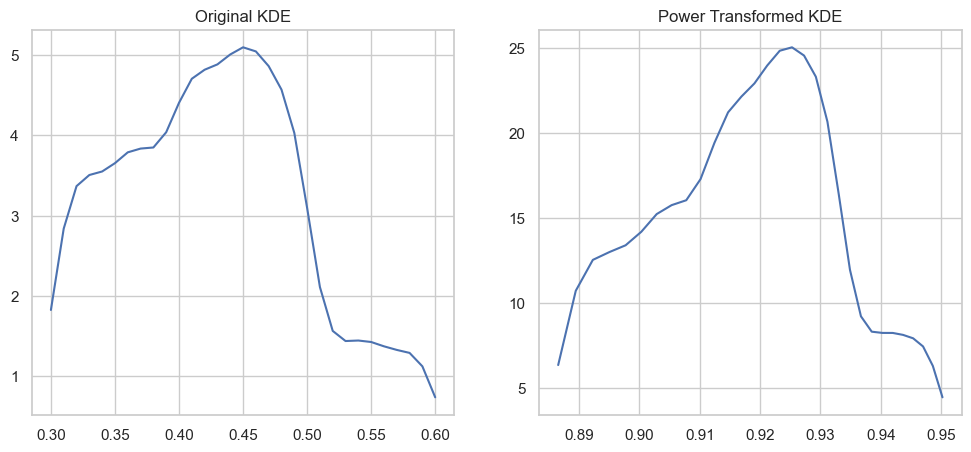

In [37]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

x = pd.to_numeric(df['Educational_to_Recreational_Ratio'], errors='coerce')

pow_x = np.power(x, 0.1)

kde1 = gaussian_kde(x)
kde2 = gaussian_kde(pow_x)

x_sorted = np.sort(x)
pow_sorted = np.sort(pow_x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(x_sorted, kde1(x_sorted))
ax1.set_title("Original KDE")

ax2.plot(pow_sorted, kde2(pow_sorted))
ax2.set_title("Power Transformed KDE")

plt.show()


In [38]:
df['Educational_to_Recreational_Ratio'] = np.power(
    pd.to_numeric(df['Educational_to_Recreational_Ratio'], errors='coerce'),
    0.1
)

In [39]:
df['Educational_to_Recreational_Ratio'].skew()


np.float64(-0.04555084664409992)

In [40]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.916906,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.886568,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.892308,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.910136,Unknown,Urban
4,12,Female,5.89,Smartphone,True,0.931150,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.921182,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.912444,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.910136,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.919066,Poor Sleep,Urban


In [41]:
df['Age'].value_counts()

Age
17    919
8     912
13    910
14    896
9     885
10    877
16    876
12    867
11    866
15    864
18    840
Name: count, dtype: int64

In [42]:
def categorize_age(age):
    if 8 < age <= 12:
        return 'child'
    elif 12 < age <= 20:
        return 'teen'

In [43]:
df['Age_Category'] = df['Age'].apply(categorize_age)

In [44]:
df['Age_Category'].value_counts()

Age_Category
teen     5305
child    3495
Name: count, dtype: int64

In [45]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Category
0,14,Male,3.99,Smartphone,True,0.916906,"Poor Sleep, Eye Strain",Urban,teen
1,11,Female,4.61,Laptop,True,0.886568,Poor Sleep,Urban,child
2,18,Female,3.73,TV,True,0.892308,Poor Sleep,Urban,teen
3,15,Female,1.21,Laptop,False,0.910136,Unknown,Urban,teen
4,12,Female,5.89,Smartphone,True,0.931150,"Poor Sleep, Anxiety",Urban,child
...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.921182,Poor Sleep,Urban,teen
9708,17,Female,4.43,Smartphone,True,0.912444,Poor Sleep,Rural,teen
9709,16,Male,5.62,Smartphone,True,0.910136,"Poor Sleep, Eye Strain, Anxiety",Rural,teen
9710,17,Male,5.60,TV,True,0.919066,Poor Sleep,Urban,teen


In [46]:
df['Primary_Device'].value_counts()

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

In [47]:
dummies = pd.get_dummies(df['Primary_Device'], prefix='Device',dtype=int)
df = pd.concat([df, dummies], axis=1)
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Category,Device_Laptop,Device_Smartphone,Device_TV,Device_Tablet
0,14,Male,3.99,Smartphone,True,0.916906,"Poor Sleep, Eye Strain",Urban,teen,0,1,0,0
1,11,Female,4.61,Laptop,True,0.886568,Poor Sleep,Urban,child,1,0,0,0
2,18,Female,3.73,TV,True,0.892308,Poor Sleep,Urban,teen,0,0,1,0
3,15,Female,1.21,Laptop,False,0.910136,Unknown,Urban,teen,1,0,0,0
4,12,Female,5.89,Smartphone,True,0.931150,"Poor Sleep, Anxiety",Urban,child,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.921182,Poor Sleep,Urban,teen,0,1,0,0
9708,17,Female,4.43,Smartphone,True,0.912444,Poor Sleep,Rural,teen,0,1,0,0
9709,16,Male,5.62,Smartphone,True,0.910136,"Poor Sleep, Eye Strain, Anxiety",Rural,teen,0,1,0,0
9710,17,Male,5.60,TV,True,0.919066,Poor Sleep,Urban,teen,0,0,1,0


In [48]:
df['Gender'].value_counts()

Gender
Male      4942
Female    4770
Name: count, dtype: int64

In [49]:
df['Exceeded_Recommended_Limit'].value_counts()

Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64

In [50]:
df['Health_Impacts'].value_counts()

Health_Impacts
Unknown                                          3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

In [51]:
final=df[[
    'Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Exceeded_Recommended_Limit',
    'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Urban_or_Rural',
    'Device_Laptop', 'Device_Smartphone', 'Device_TV', 'Device_Tablet',
]].copy()
final

,Age,Gender,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Device_Laptop,Device_Smartphone,Device_TV,Device_Tablet
0,14,Male,3.99,True,0.916906,"Poor Sleep, Eye Strain",Urban,0,1,0,0
1,11,Female,4.61,True,0.886568,Poor Sleep,Urban,1,0,0,0
2,18,Female,3.73,True,0.892308,Poor Sleep,Urban,0,0,1,0
3,15,Female,1.21,False,0.910136,Unknown,Urban,1,0,0,0
4,12,Female,5.89,True,0.931150,"Poor Sleep, Anxiety",Urban,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,True,0.921182,Poor Sleep,Urban,0,1,0,0
9708,17,Female,4.43,True,0.912444,Poor Sleep,Rural,0,1,0,0
9709,16,Male,5.62,True,0.910136,"Poor Sleep, Eye Strain, Anxiety",Rural,0,1,0,0
9710,17,Male,5.60,True,0.919066,Poor Sleep,Urban,0,0,1,0


In [52]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender','Exceeded_Recommended_Limit','Health_Impacts','Urban_or_Rural']
le = LabelEncoder()

for col in cols:
    final[col] = le.fit_transform(final[col])

In [53]:
final

,Age,Gender,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Device_Laptop,Device_Smartphone,Device_TV,Device_Tablet
0,14,1,3.99,1,0.916906,10,1,0,1,0,0
1,11,0,4.61,1,0.886568,7,1,1,0,0,0
2,18,0,3.73,1,0.892308,7,1,0,0,1,0
3,15,0,1.21,0,0.910136,15,1,1,0,0,0
4,12,0,5.89,1,0.931150,8,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9707,17,1,3.26,1,0.921182,7,1,0,1,0,0
9708,17,0,4.43,1,0.912444,7,0,0,1,0,0
9709,16,1,5.62,1,0.910136,11,0,0,1,0,0
9710,17,1,5.60,1,0.919066,7,1,0,0,1,0


In [59]:
final.skew()

Age                                 -0.002533
Gender                              -0.035431
Avg_Daily_Screen_Time_hr            -0.068933
Exceeded_Recommended_Limit          -2.013528
Educational_to_Recreational_Ratio   -0.045551
Health_Impacts                      -0.374209
Urban_or_Rural                      -0.901372
Device_Laptop                        1.987888
Device_Smartphone                    0.118844
Device_TV                            1.117906
Device_Tablet                        2.253977
dtype: float64

In [54]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Category,Device_Laptop,Device_Smartphone,Device_TV,Device_Tablet
0,14,Male,3.99,Smartphone,True,0.916906,"Poor Sleep, Eye Strain",Urban,teen,0,1,0,0
1,11,Female,4.61,Laptop,True,0.886568,Poor Sleep,Urban,child,1,0,0,0
2,18,Female,3.73,TV,True,0.892308,Poor Sleep,Urban,teen,0,0,1,0
3,15,Female,1.21,Laptop,False,0.910136,Unknown,Urban,teen,1,0,0,0
4,12,Female,5.89,Smartphone,True,0.931150,"Poor Sleep, Anxiety",Urban,child,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.921182,Poor Sleep,Urban,teen,0,1,0,0
9708,17,Female,4.43,Smartphone,True,0.912444,Poor Sleep,Rural,teen,0,1,0,0
9709,16,Male,5.62,Smartphone,True,0.910136,"Poor Sleep, Eye Strain, Anxiety",Rural,teen,0,1,0,0
9710,17,Male,5.60,TV,True,0.919066,Poor Sleep,Urban,teen,0,0,1,0


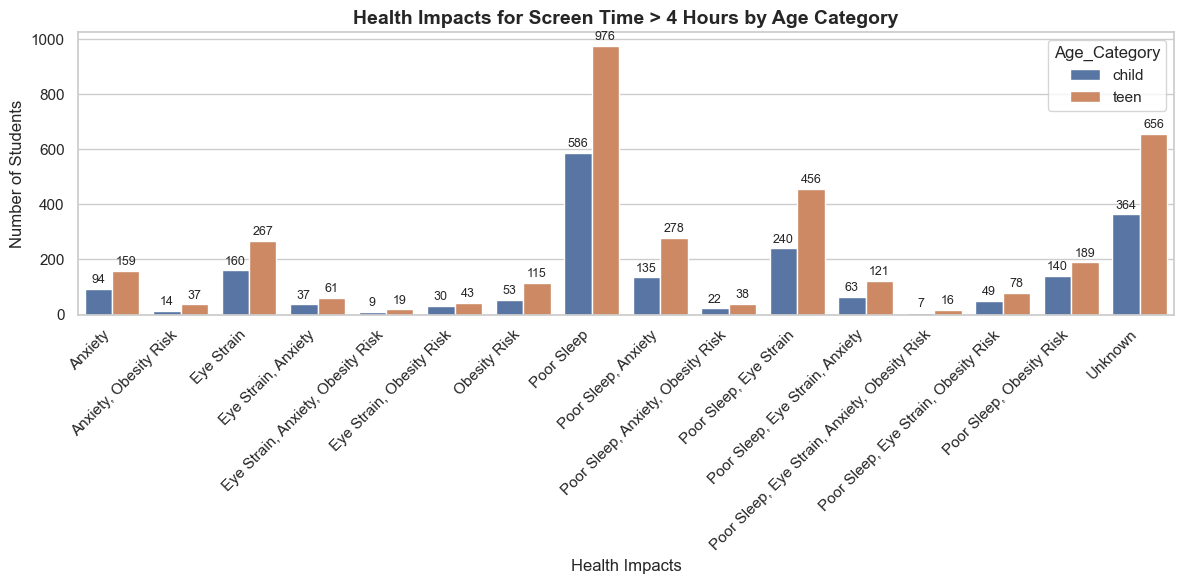

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

filtered_df = df[df['Avg_Daily_Screen_Time_hr'] > 4]

count_data = filtered_df.groupby(['Age_Category', 'Health_Impacts']).size().reset_index(name='Count')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=count_data,
    x='Health_Impacts',
    y='Count',
    hue='Age_Category',
    dodge=True
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Health Impacts', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Health Impacts for Screen Time > 4 Hours by Age Category', fontsize=14, weight='bold')
plt.tight_layout() 

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.show()


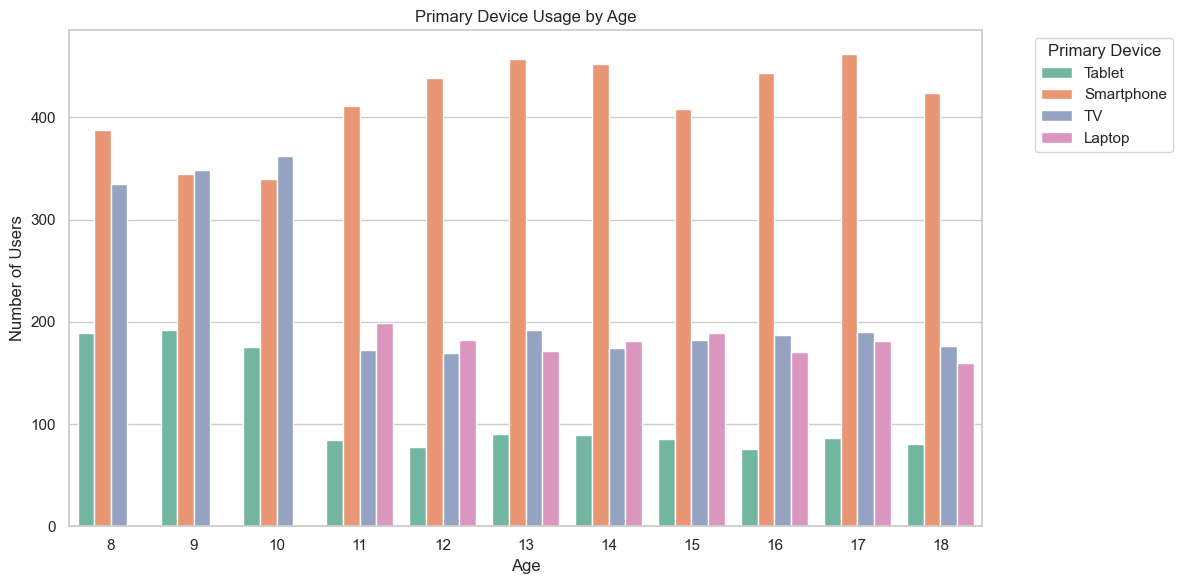

In [56]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='Age', hue='Primary_Device', palette='Set2')

plt.title("Primary Device Usage by Age")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.legend(title="Primary Device", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
corr=final.corr()

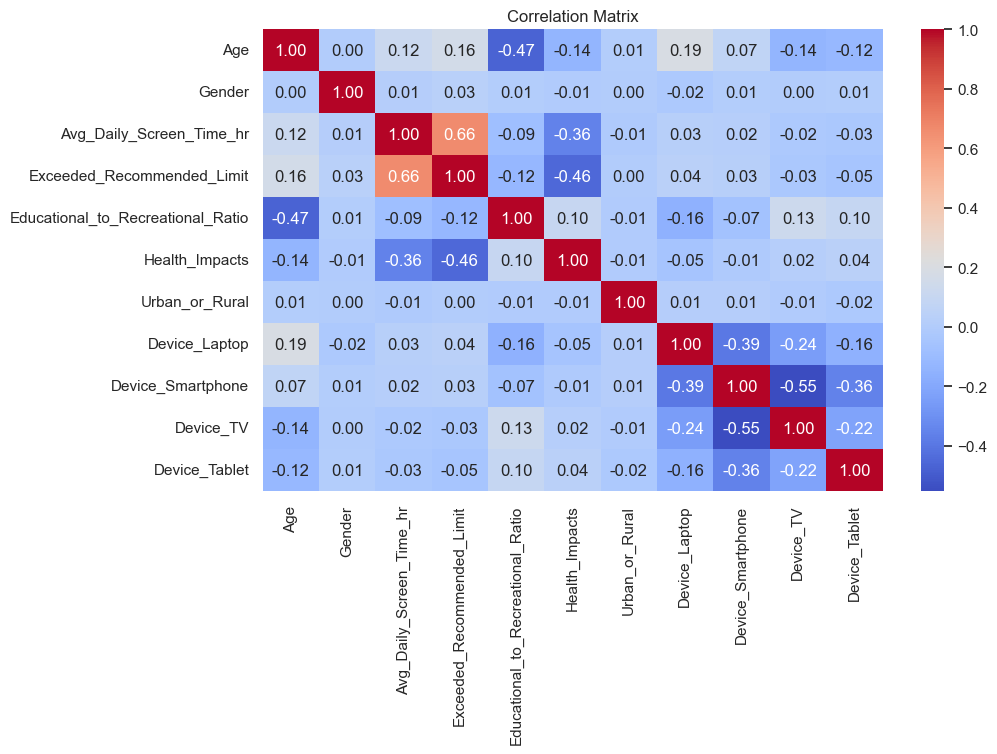

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()